#**Capstone Project - The Battle of the Neighborhoods (Week 2)**



---
**Survey to open a Food Joint**


### **Table of contents**

1.Introduction: Business Problem

2.Data

3.Methodology

4.Analysis

5.Results and Discussion

6.Conclusion


**Introduction to the Business problem**:

Mumbai financial capital of India has lot of immigrants here for earning their bread and butter.

This Capstone is intended to analyse and fetch the appropriate location in Mumbai’s Neighbourhood which will be suitable to open a food joint for business man who don’t want to invest huge amount as required to start Restaurants but still want to earn well.
Basically need is for small food joint, food truck, take away counters etc.

# **Data**

1. ***List of Mumbai’s Neighbourhood:***
This will help to identify the neighbouring areas with which further analysis can be done

2. ***Latitude and Longitude of Neighbouring areas:***
This is required to plot areas on map and also for getting the venues in these areas.

3. ***Venues in each Neighbourhood:***
This is the most important data, as this will get the insights of the places where crowd is attracted.

**Data will be extracted by using following websites**

 **Wikipedia:** To get the list of neighbouring areas of Mumbai along with its Latitude and Longitude, it will be extracted by using python web scrapping ( using pandas)

**Foursquare.com:** This site will help us to extract venues for each neighbouring area, data will be extracted by using foursquare API

Lets import the required libraries

In [84]:
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import folium


**This Wikipedia link gives us the tabular format for all the Areas in Mumbai with their Lat Long**

In [85]:
url='https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai'

In [90]:
df=pd.read_html(url)


**First value from the list is important to us for further analysis**

In [87]:
Mum_data=df[0]

In [88]:
Mum_data.shape

(93, 4)

**Lets Explore Mumbai on Maps using Folium and Foursquare**

In [142]:
Add='Mumbai,IND'
location=Nominatim(user_agent='foursquare_agent')
geolocation=location.geocode(Add)
latitude=geolocation.latitude
longitude=geolocation.longitude

print('The co-ordinates of Mumbai are {},{}'.format (latitude,longitude))

The co-ordinates of Mumbai are 19.138791599999998,72.90126536652349


In [148]:
Mum_map=folium.Map(location=(latitude,longitude),zoom_start=11)
for lat,long,label in zip(Mum_data['Latitude'],Mum_data['Longitude'],Mum_data['Area']):
   folium.CircleMarker(
       (lat,long),
       radius=5,
       popup=label,
       color='blue',
       fill=True,
       fill_color='red',
       fill_opacity=0.6
   ).add_to(Mum_map)

Mum_map

**Below are the details required for API call towards the Foursquare.com**

In [91]:
Client_id='ITQ1VVHE2SPGFGQ50SRIQXBZA3RHO2MKUPDNO0LH4N4GD2MG'
Client_secret='4Z3YMXVAXWTZYGAZNQA2BT5CVZK4IXLFLMX2LRNLB0NBBMFQ'
version='20180605'

In [92]:
Mum_data.head()

,Area,Location,Latitude,Longitude
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270


**In the Section shown below, we are creating new dataframe which will have the venues in each of the Areas in Mumbai with their Lat Long using Foursquare.com**

In [93]:
def get_venue(name,lat,lng):
  venue_list=[]
  for n,l,lg in zip(name,lat,lng):
    url=f'https://api.foursquare.com/v2/venues/explore?client_id={Client_id}&client_secret={Client_secret}&ll={l},{lg}&v={version}&radius={500}&limit={100}'
    result=requests.get(url).json()['response']['groups'][0]['items']
    venue_list.append([(
        n,
        l,
        lg,
        v['venue']['name'],
        v['venue']['categories'][0]['name'],
        v['venue']['location']['lat'],
        v['venue']['location']['lng']) for v in result])
  df=pd.DataFrame([item for v_list in venue_list for item in v_list])
  df.columns=['Area','Area Latitude','Area Longitude','Venue Name','Venue Category','Venue Latitude','Venue Location']
  return df

In [94]:
Mum_venues=get_venue(Mum_data['Area'],Mum_data['Latitude'],Mum_data['Longitude'])

**This is our Data frame with Area along with it's Lat Long and their Venues including Lat Long and Categories**

In [95]:
Mum_venues.head()

,Area,Area Latitude,Area Longitude,Venue Name,Venue Category,Venue Latitude,Venue Location
0,Amboli,19.1293,72.8434,Cafe Arfa,Indian Restaurant,19.128930,72.847140
1,Amboli,19.1293,72.8434,"5 Spice , Bandra",Chinese Restaurant,19.130421,72.847206
2,Amboli,19.1293,72.8434,Subway,Sandwich Place,19.127860,72.844461
3,Amboli,19.1293,72.8434,Cafe Coffee Day,Coffee Shop,19.127748,72.844663
4,Amboli,19.1293,72.8434,Delhi Zaika,Halal Restaurant,19.132159,72.844406


# **Methodology**

We are intended to explore the venues in nearby Areas of Mumbai and decide the appropriate location to open the Food Joint which can be profitable if the location can attaract the good number of Crowd

Usually in any place the Huge number of crowd will be on below locations:

1. Public Transport ( BUS/Train Station)
2. Tourist place
3. Parks/Gardens

Will Analyse the Public transport and already available food joints in the particular area, so as to arrive at accurate conclusion

Our focus will be to extract the crowd attracting places and make the cluster out of those places using KMeans alogrithm and to conclude which clusters/Area are best suitable for food joint

# **Analysis**

**Lets check the Areas with Public Transport **

In [96]:
Mum_station=Mum_venues[Mum_venues['Venue Category'].str.contains('Station')]

In [97]:
Mum_station.head()

,Area,Area Latitude,Area Longitude,Venue Name,Venue Category,Venue Latitude,Venue Location
28,D.N. Nagar,19.124085,72.831373,D.N. Nagar Metro Station,Light Rail Station,19.128296,72.830332
57,Lokhandwala,19.130815,72.829270,D.N. Nagar Metro Station,Light Rail Station,19.128296,72.830332
70,Marol,19.119219,72.882743,Marol Maroshi Bus Stop,Bus Station,19.117099,72.880195
116,Uttan,19.280000,72.785000,Uttan Naka,Bus Station,19.280724,72.784785
258,Dahisa,19.250069,72.859347,Dahisar Railway Station,Train Station,19.250057,72.859397


**Groupby the dataframe with Area to check how many stations are there in one area**

In [98]:
Mum_v=Mum_station.groupby('Area').count()

In [99]:
Mum_v.head()

,Area Latitude,Area Longitude,Venue Name,Venue Category,Venue Latitude,Venue Location
Area,,,,,,
Asalfa,2,2,2,2,2,2
Cavel,1,1,1,1,1,1
Chira Bazaar,1,1,1,1,1,1
Cotton Green,1,1,1,1,1,1
D.N. Nagar,1,1,1,1,1,1


In [100]:
Mum_v.reset_index(inplace=True)

In [101]:
Mum_v.head()

,Area,Area Latitude,Area Longitude,Venue Name,Venue Category,Venue Latitude,Venue Location
0,Asalfa,2,2,2,2,2,2
1,Cavel,1,1,1,1,1,1
2,Chira Bazaar,1,1,1,1,1,1
3,Cotton Green,1,1,1,1,1,1
4,D.N. Nagar,1,1,1,1,1,1


***To check the Area vs Station count, lets have barplot ***

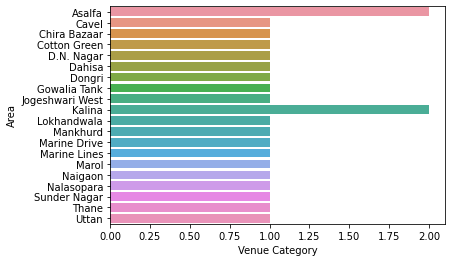

In [17]:
sns.barplot(Mum_v['Venue Category'],Mum_v['Area'])

Only 2 Areas namely **Kalina** and **Asalfa** has more than 1 Station, this will be useful for conclusion once we have clusters

**Now in our data frame we already have the Areas with food Joints**

In [152]:
Mum_food=Mum_venues[Mum_venues['Venue Category'].str.contains('Snack Place|Food Truck|Chaat Place')]
Mum_food.shape

(28, 7)

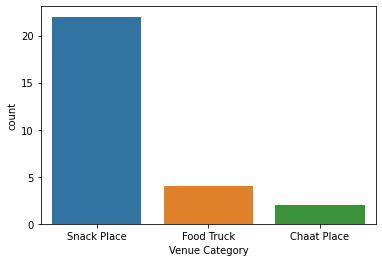

In [104]:
sns.countplot(Mum_food['Venue Category'])

**The Countplot clarifies the number of Food Joint already available in Mumbai Area.**

**It's clear the potential for Food trucks and Chaat place is very high as compared to Snack place.**



**Now Lets make a group based on Area and Venue Category which contains only food joint**

In [105]:
Mum_f=Mum_food.groupby(['Area','Venue Category']).count().reset_index()


In [106]:
Mum_f.head()

,Area,Venue Category,Area Latitude,Area Longitude,Venue Name,Venue Latitude,Venue Location
0,Bandstand Promenade,Food Truck,1,1,1,1,1
1,Breach Candy,Snack Place,1,1,1,1,1
2,Carmichael Road,Food Truck,1,1,1,1,1
3,Carmichael Road,Snack Place,1,1,1,1,1
4,"Chakala, Andheri",Snack Place,1,1,1,1,1


**We can visualize the Barplot to check Area wise food joint count**

Text(0.5, 0, 'Count of Food Joints')

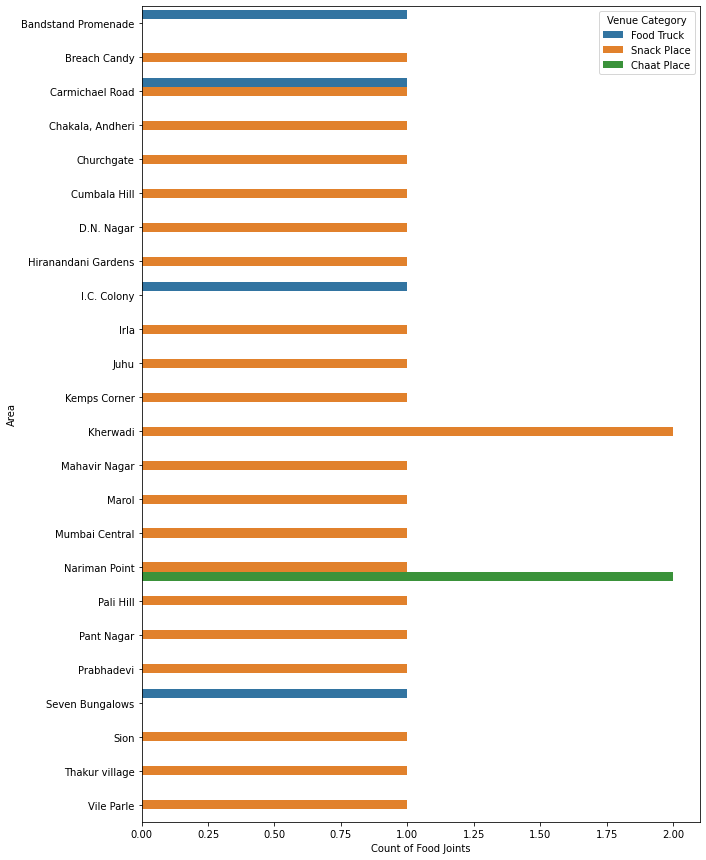

In [107]:
plt.figure(figsize=(10,15))
ax=sns.barplot(y='Area',x='Venue Name',hue='Venue Category',data=Mum_f)
ax.set_xlabel('Count of Food Joints')

From the above Plot it can be observed that only 2 Areas have more than 1 Food Joint  and most of the areas have snack place which are kind of immovable stalls

**Nariman Point** and **Charmichael Road** are the areas with 2 Food joints, it will be helpful to reach to conclusion once clusters are ready

**Now to obtain good results, we will filter already available food joints along with the places which attarcts decent crowd for further analysis**

In [112]:
Mum_t_s=(Mum_venues[Mum_venues['Venue Category'].str.contains(
    'Station|Snack Place|Food Truck|Chaat Place|Arts & Entertainment|Boat or Ferry|Park|Beach|Playground|Performing Arts Venue|Comedy Club|Garden|Art Gallery|History Museum|Monument / Landmark')])

In [113]:
Mum_t_s.reset_index(inplace=True)

**To apply KMeans algorithm, we dont require Area column hence dropping it and rest of the columns for Venue category will be converted to numeric values by using get_dummies**

In [114]:
Mum_t_s.drop(columns='index',inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [122]:
Mum_dummies=pd.get_dummies(Mum_t_s['Venue Category'])

In [123]:
Mum_dummies.head()

,Art Gallery,Beach,Beer Garden,Boat or Ferry,Bus Station,Chaat Place,Comedy Club,Food Truck,Garden,History Museum,Light Rail Station,Monument / Landmark,Park,Performing Arts Venue,Playground,Snack Place,Train Station
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


**Adding Area column again for better understanding and sorting the data frame to make the Area column as first column**

In [124]:
Mum_dummies['Area']=Mum_t_s['Area']

In [31]:
Mum_dummies.head()

,Art Gallery,Beach,Beer Garden,Boat or Ferry,Bus Station,Chaat Place,Comedy Club,Food Truck,Garden,History Museum,Light Rail Station,Monument / Landmark,Park,Performing Arts Venue,Playground,Snack Place,Train Station,Area
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,"Chakala, Andheri"
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,D.N. Nagar
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,D.N. Nagar
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Lokhandwala
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Marol


In [125]:
Mum_dummies_sort=[Mum_dummies.columns[-1]]+list(Mum_dummies.columns[0:-1])
                                  

In [126]:
Mum_dummies=Mum_dummies[Mum_dummies_sort]

In [127]:
Mum_dummies.head()

,Area,Art Gallery,Beach,Beer Garden,Boat or Ferry,Bus Station,Chaat Place,Comedy Club,Food Truck,Garden,History Museum,Light Rail Station,Monument / Landmark,Park,Performing Arts Venue,Playground,Snack Place,Train Station
0,"Chakala, Andheri",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,D.N. Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,D.N. Nagar,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,Lokhandwala,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Marol,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


**Now Lets group the dataframe by Area and take the mean of the venue category, as it will get you the mean of places available in particular Area**

In [131]:
Mum_group=Mum_dummies.groupby('Area').mean().reset_index()


**One of the place is Beer Garden which is not the Garden which we are considering hence dropping it**

In [132]:
Mum_group.drop(columns='Beer Garden',axis=1,inplace =True)

In [133]:
Mum_group.head()

,Area,Art Gallery,Beach,Boat or Ferry,Bus Station,Chaat Place,Comedy Club,Food Truck,Garden,History Museum,Light Rail Station,Monument / Landmark,Park,Performing Arts Venue,Playground,Snack Place,Train Station
0,Amrut Nagar,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0,0.00,0.0,0.0,0.0
1,Asalfa,0.0,0.00,0.00,0.5,0.0,0.0,0.00,0.0,0.0,0.5,0.0,0.0,0.00,0.0,0.0,0.0
2,Bandstand Promenade,0.0,0.25,0.25,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0
3,Breach Candy,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.0,0.0
4,C.G.S. colony,0.0,0.00,0.00,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0


**Now as we got our Data frame with each Area along with mean value of the venues category.**

**Lets Standardized the data before applying clustering algo **

In [134]:
from sklearn.preprocessing import StandardScaler
cluster_data=Mum_group.drop(columns='Area',axis=1)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cluster_data)



**After all the struggle, now its team to make some action by applying Kmean algorithm**

In [135]:
from sklearn.cluster import KMeans
from sklearn import metrics

**Now lets get the optimum number of cluster required for this we will follow the Elbow graph, wherein we calculate Interia**

**Inertia is the sum of squared error for each cluster. Therefore the smaller the inertia the denser the cluster**



In [ ]:

wcc=[]
for i in range(1,30):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0).fit(data_scaled)
  wcc.append(kmeans.inertia_)





**As per the Elbow method the number of cluster at the elbow where it starts just changing the curve is the optimum value.**

It seems 14 is the optimum value of cluster

**Lets build the model with 14 cluster**

Text(0, 0.5, 'Inertia')

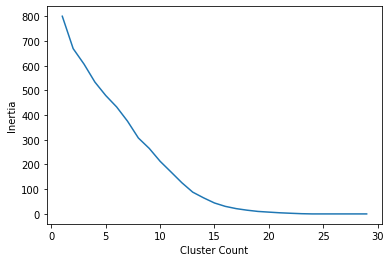

In [155]:
plt.plot(range(1,30),wcc)
plt.xlabel('Cluster Count')
plt.ylabel('Inertia')

In [42]:
kmeans_1=KMeans(n_clusters=14,init='k-means++',random_state=0).fit(data_scaled)
print(kmeans_1.labels_)

[ 6  4 10  0 12  0  9  0 12  9 13  9 12  0  4  9  1  5  6  0  7  0  3  0
  2  4  6  0  6  4  6  9  9  9  6  0  9  3  8 13 11  6  0  7  0  3  0  3
  1  0]


**After applying the model, we get the number clusters and add the same in the dataframe, so that we can filter data frame based on cluster**

In [61]:
cluster_data.insert(0,'Cluster',kmeans_1.labels_)
cluster_data.head()

,Cluster,Art Gallery,Beach,Boat or Ferry,Bus Station,Chaat Place,Comedy Club,Food Truck,Garden,History Museum,Light Rail Station,Monument / Landmark,Park,Performing Arts Venue,Playground,Snack Place,Train Station
0,6,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0,0.00,0.0,0.0,0.0
1,4,0.0,0.00,0.00,0.5,0.0,0.0,0.00,0.0,0.0,0.5,0.0,0.0,0.00,0.0,0.0,0.0
2,10,0.0,0.25,0.25,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0
3,0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.0,0.0
4,12,0.0,0.00,0.00,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0


In [66]:
Mum_group.insert(1,'Cluster',kmeans_1.labels_)
Mum_group.head()

,Area,Cluster,Art Gallery,Beach,Boat or Ferry,Bus Station,Chaat Place,Comedy Club,Food Truck,Garden,History Museum,Light Rail Station,Monument / Landmark,Park,Performing Arts Venue,Playground,Snack Place,Train Station
0,Amrut Nagar,6,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0,0.00,0.0,0.0,0.0
1,Asalfa,4,0.0,0.00,0.00,0.5,0.0,0.0,0.00,0.0,0.0,0.5,0.0,0.0,0.00,0.0,0.0,0.0
2,Bandstand Promenade,10,0.0,0.25,0.25,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0
3,Breach Candy,0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.0,0.0
4,C.G.S. colony,12,0.0,0.00,0.00,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0


## **Cluster wise Analysis**

In [68]:
Mum_group[Mum_group['Cluster']==0]

,Area,Cluster,Art Gallery,Beach,Boat or Ferry,Bus Station,Chaat Place,Comedy Club,Food Truck,Garden,History Museum,Light Rail Station,Monument / Landmark,Park,Performing Arts Venue,Playground,Snack Place,Train Station
3,Breach Candy,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0
5,Carmichael Road,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.0
7,"Chakala, Andheri",0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0
13,Cumbala Hill,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0
19,Hiranandani Gardens,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0
21,Irla,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0
23,Juhu,0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0
27,Khar Danda,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
35,Mumbai Central,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0
42,Prabhadevi,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0


As per the given data

Cluster 0: Has great chunk of Areas with Snack places in almost all areas there is huge potenttial for Food Trucks in these areas.

Only Two areas has tourist place (Beach) those are Juhu and Vile Parle

Recommended areas from Cluster 0 are Juhu and Vile Parle for Food joint near to beaches

In [70]:
Mum_group[Mum_group['Cluster']==1]

,Area,Cluster,Art Gallery,Beach,Boat or Ferry,Bus Station,Chaat Place,Comedy Club,Food Truck,Garden,History Museum,Light Rail Station,Monument / Landmark,Park,Performing Arts Venue,Playground,Snack Place,Train Station
16,Dongri,1,0.0,0.5,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0
48,Uttan,1,0.0,0.5,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0


As per given Data

Cluster 1: Has more areas compared to cluster 0 which can attarct crowd

There are Beaches, Bus station and playground, both the areas in cluster 1 are good for Food Joint as both of them dont have any food joint

In [71]:
Mum_group[Mum_group['Cluster']==2]

,Area,Cluster,Art Gallery,Beach,Boat or Ferry,Bus Station,Chaat Place,Comedy Club,Food Truck,Garden,History Museum,Light Rail Station,Monument / Landmark,Park,Performing Arts Venue,Playground,Snack Place,Train Station
24,Kala Ghoda,2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.2,0.2,0.0,0.0,0.0,0.0


As per given Data

Cluster 2: It has Art gallery, Museum and park, most of the Art galleries and Museum have there own canteen.

This cluster doesn't look for food joint

In [72]:
Mum_group[Mum_group['Cluster']==3]

,Area,Cluster,Art Gallery,Beach,Boat or Ferry,Bus Station,Chaat Place,Comedy Club,Food Truck,Garden,History Museum,Light Rail Station,Monument / Landmark,Park,Performing Arts Venue,Playground,Snack Place,Train Station
22,Jogeshwari West,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,Nalasopara,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,Sunder Nagar,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,Thane,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As per Given Data:

Cluster 3: Only has Bus Station which can attract crowd but that too is very limited.

We can avoid cluster 3

In [73]:
Mum_group[Mum_group['Cluster']==4]

,Area,Cluster,Art Gallery,Beach,Boat or Ferry,Bus Station,Chaat Place,Comedy Club,Food Truck,Garden,History Museum,Light Rail Station,Monument / Landmark,Park,Performing Arts Venue,Playground,Snack Place,Train Station
1,Asalfa,4,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
14,D.N. Nagar,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0
25,Kalina,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.5
29,Lokhandwala,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


As per Given Data:

Cluster 4: Only has Rail Station which can attract crowd but that too for limited hours, dont have much option to explore

We can consider this cluster 4 for those who want to have part time food joints at peak hours

Suitable Areas: Kalina and Lokhandwala

In [74]:
Mum_group[Mum_group['Cluster']==5]

,Area,Cluster,Art Gallery,Beach,Boat or Ferry,Bus Station,Chaat Place,Comedy Club,Food Truck,Garden,History Museum,Light Rail Station,Monument / Landmark,Park,Performing Arts Venue,Playground,Snack Place,Train Station
17,Gorai,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As per Given Data:

Cluster 5: Only has single Beach which can attract crowd only on weekends

We can avoid this option

In [75]:
Mum_group[Mum_group['Cluster']==6]

,Area,Cluster,Art Gallery,Beach,Boat or Ferry,Bus Station,Chaat Place,Comedy Club,Food Truck,Garden,History Museum,Light Rail Station,Monument / Landmark,Park,Performing Arts Venue,Playground,Snack Place,Train Station
0,Amrut Nagar,6,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0
18,Gowalia Tank,6,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.333333,0.0,0.0,0.000000,0.0
26,Kemps Corner,6,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.500000,0.0,0.0,0.500000,0.0
28,Kherwadi,6,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.250000,0.0,0.0,0.500000,0.0
30,Mahavir Nagar,6,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.500000,0.0,0.0,0.500000,0.0
34,Marol,6,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.333333,0.0,0.0,0.333333,0.0
41,Pant Nagar,6,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.500000,0.0,0.0,0.500000,0.0


As per given Data:

Cluster 6: One of the Area Gowalia Tank looks attractive, as it has Bus Station, Park, Museum

This area can be explored for food Joint

In [76]:
Mum_group[Mum_group['Cluster']==7]

,Area,Cluster,Art Gallery,Beach,Boat or Ferry,Bus Station,Chaat Place,Comedy Club,Food Truck,Garden,History Museum,Light Rail Station,Monument / Landmark,Park,Performing Arts Venue,Playground,Snack Place,Train Station
20,I.C. Colony,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,Seven Bungalows,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As per given Data:

Cluster 7: Doest have any crowd attracting area

This area can be skipped

In [77]:
Mum_group[Mum_group['Cluster']==8]

,Area,Cluster,Art Gallery,Beach,Boat or Ferry,Bus Station,Chaat Place,Comedy Club,Food Truck,Garden,History Museum,Light Rail Station,Monument / Landmark,Park,Performing Arts Venue,Playground,Snack Place,Train Station
38,Nariman Point,8,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.25,0.0


As per given Data:

Cluster 8: Doest have much crowd attracting area

This area can be skipped

In [78]:
Mum_group[Mum_group['Cluster']==9]

,Area,Cluster,Art Gallery,Beach,Boat or Ferry,Bus Station,Chaat Place,Comedy Club,Food Truck,Garden,History Museum,Light Rail Station,Monument / Landmark,Park,Performing Arts Venue,Playground,Snack Place,Train Station
6,Cavel,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,Chira Bazaar,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11,Cotton Green,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15,Dahisa,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31,Mankhurd,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32,Marine Drive,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33,Marine Lines,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36,Naigaon,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


As per Given Data:

Cluster 9: Only has Rail Station which can attract crowd but that too for limited hours, dont have much option to explore

We can consider this cluster 9 for those who want to have part time food joints at peak hours

Suitable Areas: All areas have Station, area to be selected as per crowd by exploring it for few days

In [79]:
Mum_group[Mum_group['Cluster']==10]

,Area,Cluster,Art Gallery,Beach,Boat or Ferry,Bus Station,Chaat Place,Comedy Club,Food Truck,Garden,History Museum,Light Rail Station,Monument / Landmark,Park,Performing Arts Venue,Playground,Snack Place,Train Station
2,Bandstand Promenade,10,0.0,0.25,0.25,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0


As per Given Data:

Cluster 10: Seems to have good tourist and crowd attracting places, it has

Beach, Boating and Arts venue and it has good potential for Food joint

In [80]:
Mum_group[Mum_group['Cluster']==11]

,Area,Cluster,Art Gallery,Beach,Boat or Ferry,Bus Station,Chaat Place,Comedy Club,Food Truck,Garden,History Museum,Light Rail Station,Monument / Landmark,Park,Performing Arts Venue,Playground,Snack Place,Train Station
40,Pali Naka,11,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As per given Data:

Cluster 11: Doest have much crowd attracting area

This area can be skipped

In [81]:
Mum_group[Mum_group['Cluster']==12]

,Area,Cluster,Art Gallery,Beach,Boat or Ferry,Bus Station,Chaat Place,Comedy Club,Food Truck,Garden,History Museum,Light Rail Station,Monument / Landmark,Park,Performing Arts Venue,Playground,Snack Place,Train Station
4,C.G.S. colony,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Chembur,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,Cuffe Parade,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As per given Data:

Cluster 12: Doest have much crowd attracting area

This area can be skipped

In [82]:
Mum_group[Mum_group['Cluster']==13]

,Area,Cluster,Art Gallery,Beach,Boat or Ferry,Bus Station,Chaat Place,Comedy Club,Food Truck,Garden,History Museum,Light Rail Station,Monument / Landmark,Park,Performing Arts Venue,Playground,Snack Place,Train Station
10,Churchgate,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.5,0.0
39,Pali Hill,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.5,0.0


As per given Data:

Cluster 13: Doest have much crowd attracting area

This area can be skipped

# **Results**

Now that we have all the data in hand, we got the clusters derived the insights as well.

Lets discuss the details from our analysis

1. **Public Transport:**

  From the barplot we got two areas  **Kalina** and **Asalfa** having more than 1 Station, both these areas are in cluster 4

These areas have added advantage as more the Station more the crowd, will keep these places in mind while taking decision

2. **Area vs Food Joint Bar plot:**
   
  **Nariman Point** and **Charmichael Road** are the two areas which have more than 1 food joint already available

**Nariman Point** is in cluster 4

**Charmichael Road** is in cluster 0

Competition is already high in these areas, will need to check if cluster 4 and cluster 0 has good crowd or else we can drop these areas.


---




**Cluster Insights:**

Clusters 2,3,5,7,8,11,12,13 are not worth for opening food joints as these areas lack in crowd attracting areas.

Now we are left with

**Cluster 0:**

Has only Two areas has tourist place (Beach) those are Juhu and Vile Parle


**Cluster 1:** Has more areas compared to cluster 0 which can attarct crowd

There are Beaches, Bus station and playground, both the areas in cluster 1 are good for Food Joint as both of them dont have any food joint




**Cluster 4:** It has Station only, meaning people looking for part time food business 

Suitable Areas: Kalina and Lokhandwala


**Cluster 6:** One of the Area Gowalia Tank looks attractive, as it has Bus Station, Park, Museum



**Cluster 9:** It has Station only, meaning people looking for part time food business 

Suitable Areas: All areas have Station, area to be selected as per crowd by exploring it for few days


**Cluster 10:** Seems to have good tourist and crowd attracting places, it has

Beach, Boating and Arts venue and it has good potential for Food joint




# **Discussion**

From the Above discussion

Cluster 0 is ruled out as it has only beaches

Cluster 1 and 10 has beaches,boating, bus station and playground

Cluster 4 and 9 are good bet for part time food business

Cluster 6 as stand alone looked good but compared to other cluster this isnt much interesting as it has Museum and Station compared to others will have low crowd




# **Conclusion**

As our intention was to find out the best location to have food joint, we wanted to have areas with good crowd so that business can grow and people roaming or visiting such places get benifits of having delicious food at very lower rates

It has two Categories

**1. Full time business:**
   Cluster 1 and Cluster 10 are best suited for Full time business.

   Considering Mumbai has beaches and Tourist usually enjoy going for Beaches and Boat Rides, so cluster 10 has all the required places to attract good crowd

Food Joint recommendation for Full time business goes to Cluster 10 and Area is **Bandstand Promenade**


**2. Part time Business:** :
Cluster 4 and Cluster 9 are having good number of Plubic Transports and both the clusters will have great crowd in peak hours (while commuting to/from office or colleges)

Food Joint Recommendation goes to Cluster 4's Area **Kalina** and **Asalfa** as both has two station each

While one can explore Cluster 9 as well but it should strictly based on the crowd behaviour

Overall recommendation is to focus on **Food Truck** as they are very less in number and can be located from place to place.